---
안녕하세요. Data Will 팀입니다. <br>
저희 프로젝트는 최근 화두가 되고 있는 **'MZ세대'**에 대해서 분석하고, 은행 및 금융권에서 분석결과를 활용할 방법을 찾고자 출발했습니다. <br>
또한, 마침 우리 팀이 20대 2명, 30대 1명인 MZ 세대로 구성되어 더욱 관심을 가지고 프로젝트를 수행할 수 있었습니다. <br>
아직 부족하지만 재미있게 읽어주시고, 피드백이나 궁금한 사항들은 댓글 남겨주시면 감사하겠습니다. :)
---

# 목차<br>

**Intro: 들어가며**<br>
    
**0. 라이브러리 및 데이터 불러오기** <br>
    
**1. Data Collection: 데이터 수집** <br>
* 1.1 신한은행 데이터 
* 1.2 BC카드 데이터
* 1.3 한국투자증권 데이터
* 1.4 KRX 데이터

**2. EDA(Exploratory Data Analysis): 데이터 분석** <br>
* 2.1 소득 및 자산
* 2.2 소비
* 2.3 투자
    
**3. Modeling: 모델링** <br>
* 3.1 K-means
* 3.2 Decision Tree
    
**4. Conclusion and Insight: 결론 및 아이디어 제시** <br>
    
**5. 참고자료**
<br>

# Intro: 들어가며
## <font size = 4><span style="color:#81B622">*은행과 금융권은 왜 MZ세대를 주목할까*</font>
<br>
<br>
MZ세대의 재테크에 대한 관심이 증가하면서 금융상품 및 서비스에 관한 수요가 증가하고 있습니다. 또한 기술의 발달로 인해, 금융장벽이 허물어지면서 기존 전통적 강자였던 거대 은행들과 빅테크 기업들의 경쟁이 본격화되면서, MZ세대를 확보하는 것이 더욱 중요해졌습니다.<br>
<br>
디지털 환경에 익숙하고 편리함을 선호하는 MZ세대를 빅테크 기업이 적극적으로 공략하면서, 대다수의 MZ세대를 끌어들이는데 성공했습니다. 뒤이어, 기존의 거대 은행들도 뒤따라 여러 MZ세대를 위한 상품을 출시하면서 MZ세대 공략에 적극적으로 나서고 있습니다. 이로 인해 MZ세대를 둘러싼 무한한 경쟁이 본격적으로 시작되었습니다.<br>
<br>
MZ세대는 다양한 형태의 소비, 투자 형태를 보이고 있습니다. 때문에 적절한 서비스 제공을 위해서는 우선적으로 MZ세대의 투자습관, 소비성향 등의 특징을 파악할 필요가 있습니다. 따라서 본 데이터 분석에서 소득 및 자산, 소비, 투자로 나누어 MZ세대의 다양한 특성을 파악하고, 각각의 특성에 적합한 금융 서비스 및 상품을 기획하고자 합니다.<br>
<br>
    
* **MZ 세대의 소득 및 자산**<br>
<br>
    
 + 1-1. MZ세대의 소득 특징을 파악합니다.<br>
    
 + 1-2. MZ세대의 금융자산 현황을 파악합니다.<br>
    
 + 1-3. 20대와 30대의 금융자산 보유에 따른 특징을 분류합니다.<br>
  <br>
  <br>
    
* **MZ 세대의 소비**<br>
<br>
    
 + 1-1. 코로나 전과 후로 달라진 MZ세대들의 소비 패턴을 분석합니다.<br>
    
 + 1-2. MZ 세대들의 소비 패턴이 달라진 인과 관계를 데이터에서 파악합니다.<br>
    
 + 1-3. M세대와 Z세대의 소비 패턴을 분석합니다.<br>
<br>
<br>
    
* **MZ 세대의 투자**<br>
<br>
    
 + 1-1. MZ세대의 선호하는 투자방식을 파악합니다.<br>
    
 + 1-2. MZ세대가 '동학개미운동' 에 기여한 부분을 분석합니다.<br>
    
 + 1-3. MZ세대의 주식투자 특징을 데이터에서 파악합니다.<br>
<br>

프로젝트 구성 소개<br>
<br>
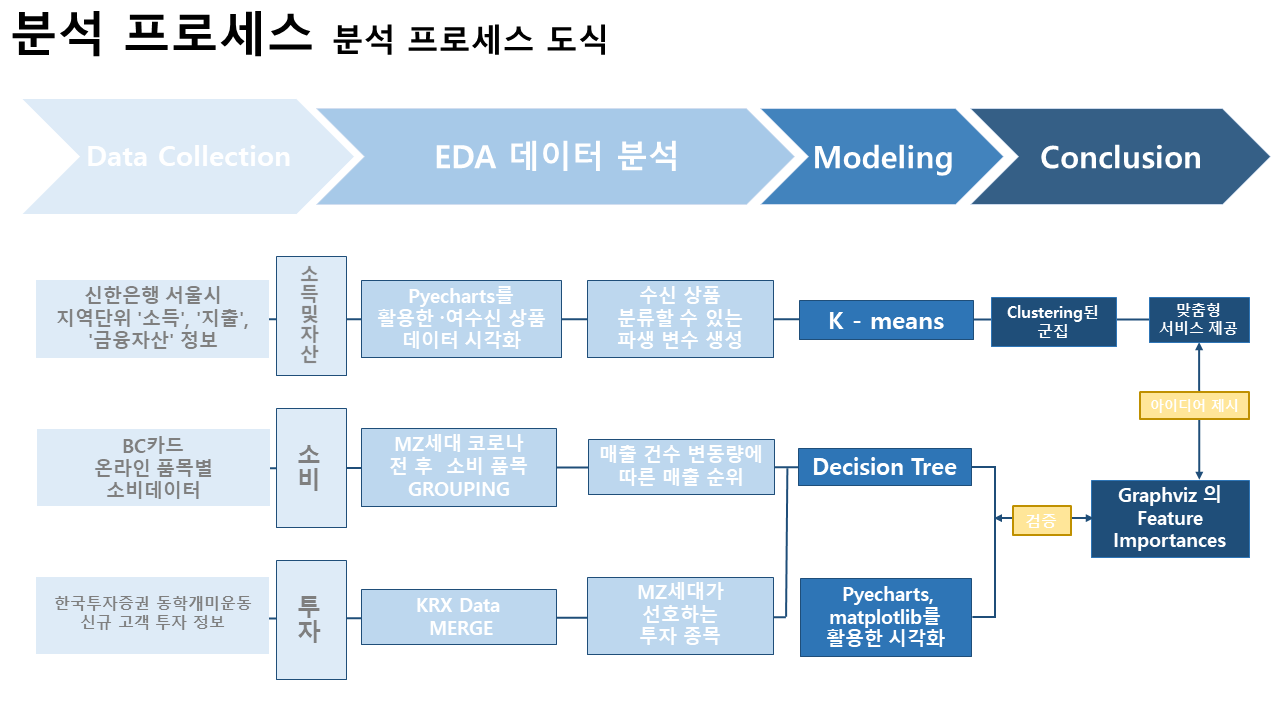

# 0. 라이브러리 및 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib import font_manager, rc

pd.set_option('display.max_columns', None)
warnings.filterwarnings(action='ignore')
pd.options.display.float_format = '{:.5f}'.format
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

%matplotlib inline
import pyecharts
from pyecharts import *
from datetime import datetime
from IPython.display import Image
from pyecharts import Line
from pyecharts import Bar
from pyecharts import online
online()

## pyecharts 라이브러리가 import 되지 않을 경우 아래 라이브러리를 install 해주세요.
## pip install pyecharts==0.5.11
## pip install pyecharts-snapshot

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Data Collection: 데이터 수집

## 1.1 데이터 출처 및 설명
### 1.1.1 데이터 출처
- 신한은행 데이터, 서울시 지역단위 '소득', '지출', '금융자산' <br>https://www.findatamall.or.kr/fsec/dataProd/generalDataProdDetail.do?cmnx=44&goods_id=6e7665e9-af0e-11eb-9f58-f220ef21bb88<br>
<br>
- BC카드 데이터, 온라인 품목별 소비데이터
<br>https://www.findatamall.or.kr/fsec/dataProd/generalDataProdDetail.do?cmnx=44&goods_id=ff9d6fe3-aed0-11eb-9f58-f220ef21bb88<br>
<br>
- 한국투자증권 데이터, 동학개미운동 신규 고객 투자 정보
<br>https://www.findatamall.or.kr/fsec/dataProd/generalDataProdDetail.do?cmnx=44&goods_id=410eb5df-e38b-11eb-9f58-f220ef21bb88<br>
<br>
- KRX 데이터, KOSPI, KOSDAQ 업종분류 현황
<br>http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201

### 1.1.2 데이터 설명
- 신한은행 데이터: 2019년~2021년의 3월, 9월 월별로 서울시에 거주하는 신한은행 거래 고객의 지역(집계구), 직장인여부, 성별, 연령구분에 따른 평균 금융 정보 데이터.<br>
<br>
- BC카드 데이터: 2019년~2021년 3월, 9월 월별로 온라인 품목(대/중분류) 상세 매출 데이터.<br>
<br>
- 한국투자증권 데이터: 동학개미운동(20.01.20~20.03.31) 기간 동안 한국투자증권에 신규 고객으로 등록하고 국내주식을 매매한 고객 약 27만명 중, 거래내역 횟수가 총 30회 이상인 고객 약 2.5만명(10% 수준) 랜덤추출한 데이터.<br>
<br>
- KRX 데이터: 한국거래소가 개설한 KRX 정보데이터시스템에서 제공하는 데이터 중 코스피, 코스닥에 상장된 종목의 업종과 시가총액을 추출한 데이터.

## 1.2 데이터 로드

### 1.2.1 신한은행 데이터 로드

In [2]:
fd1 = pd.read_excel('c:\\data\\fin\\finance_data201903.xlsx')
fd2 = pd.read_excel('c:\\data\\fin\\finance_data201909.xlsx')
fd3 = pd.read_excel('c:\\data\\fin\\finance_data202003.xlsx')
fd4 = pd.read_excel('c:\\data\\fin\\finance_data202009.xlsx')
fd5 = pd.read_excel('c:\\data\\fin\\finance_data202103.xlsx')
shin = pd.concat([fd1,fd2,fd3,fd4,fd5],axis=0) #데이터 결합
shin.head()

,기준년월,지역구,법정동코드,법정동,집계구코드,나이,성별,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
0,201903,강남구,11680101,역삼동,1123064010001,2,1,0,0,0,0,2018319,2430312,0,0,0,0,0,0,0
1,201903,강남구,11680101,역삼동,1123064010001,2,2,0,0,0,0,2326837,2221251,0,0,0,0,0,0,0
2,201903,강남구,11680101,역삼동,1123064010001,3,1,0,0,0,0,1771639,1382057,1841250,0,0,0,0,0,0
3,201903,강남구,11680101,역삼동,1123064010001,3,2,0,0,0,0,1745601,2902578,3561440,0,0,0,0,0,0
4,201903,강남구,11680101,역삼동,1123064010001,4,1,0,0,0,0,1712433,1746992,8831666,0,0,0,0,0,0


### 1.2.2 BC카드 데이터 로드

In [3]:
bc = pd.read_csv('C:\\data\\fin\\금융보안원_경진대회_데이터(최종제출).csv')
bc.head()

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58


### 1.2.3 한국투자증권 데이터 로드

In [ ]:
han = pd.read_excel('c:\\data\\fin\\2021금융데이터 경진대회_데이터셋_한국투자증권(원본).xlsx')
han.head()

### 1.2.4 KRX 데이터 로드

In [ ]:
kospi = pd.read_csv('c:\\data\\fin\\kospi.csv', encoding='euckr')
kospi.head()

In [ ]:
kosdaq = pd.read_csv('c:\\data\\fin\\kosdaq.csv', encoding='euckr')
kosdaq.head()

## 1.3 데이터 전처리

### 1.3.1 신한은행 데이터 전처리

In [ ]:
# 결측치 확인.
shin.isnull().sum()

In [ ]:
# 명목형 변수 확인.
shin[shin.columns[shin.dtypes.map(lambda x: x=='object')]].describe().transpose()

In [ ]:
# 중복컬럼 삭제
shin1=shin.drop(['법정동코드','집계구코드'],axis=1)
shin1.head()

In [ ]:
shin1.나이.unique() #연령데이터 종류확인.

In [ ]:
# MZ 세대와 기성세대를 구분하기 위한 컬럼을 추가.
shin2=shin1.copy() #테이블 복사.
shin2['MZ여부']=np.nan #빈 칼럼 생성
shin2['MZ여부']=shin2.나이.apply(lambda x: 'MZ세대' if (x==2)|(x==3) else '기성세대') #나이 컬럼이 2나3이면 MZ세대로 분류
shin2.head(10)

### 1.3.2 BC 카드 데이터 전처리

In [ ]:
# 결측치 확인.
bc.isnull().sum()

In [ ]:
# 필요없는 컬럼 제거 + 분석에 부적합한 명목형 변수 제거
bc.drop(['고객소재지_광역시도','고객소재지_시군구','고객소재지_읍면동'],axis=1,inplace=True)
bc.head()

In [ ]:
bc['연령'].unique() # array(['40대', '20대', '30대', '50대', '60대 이상', '20세 미만'], dtype=object)

In [ ]:
# 연령, 성별, 세대별 구분을 위해 파생변수를 추가 
# 연령 컬럼 1,2,3,4,5,6
bc['연령'].unique() # array(['40대', '20대', '30대', '50대', '60대 이상', '20세 미만'], dtype=object)

def age(x):
    if x == '20세 미만':
        return x.replace(x,'1')
    elif x == '20대':
        return x.replace(x,'2')
    elif x == '30대':
        return x.replace(x,'3')
    elif x == '40대':
        return x.replace(x,'4')
    elif x == '50대':
        return x.replace(x,'5')
    else:
        return x.replace(x,'6')

bc['연령'] = bc['연령'].apply(age)
bc['연령'] = bc['연령'].astype('int64')

In [ ]:
# 성별 컬럼 여 1, 남 0
bc['성별'] = bc['성별'].apply(lambda x:1 if x=='여성' else 0)

In [ ]:
# 파생변수 추가 매출평균.
pd.options.display.float_format = '{:,.0f}'.format
bc['매출평균'] = bc['매출금액']/bc['매출건수']

In [ ]:
# mz세대 -> 연령(1,2,3) -> 1, 나머지 0
bc['mz세대'] = bc['연령'].apply(lambda x:1 if x in (1,2,3) else 0)

### 1.3.3 한국투자증권 데이터 전처리

In [ ]:
# '동일나이군구분코드' 컬럼을 기준으로 그룹핑. 나머지 컬럼들은 total 값 출력.
grouped_sum = han.groupby('동일나이군구분코드').sum()
grouped_sum

In [ ]:
# '동일나이군구분코드' 컬럼을 기준으로 그룹핑. 나머지 컬럼들은 평균값 출력.
grouped_mean = han.groupby('동일나이군구분코드').mean()
grouped_mean

### 1.3.4 KRX 데이터 전처리

In [ ]:
# kospi, kosdaq 데이터프레임에서 필요한 컬럼만 추려 kos 데이터프레임 생성.
kospi2 = kospi[['종목코드', '업종명', '시가총액']]
kosdaq2 = kosdaq[['종목코드', '업종명', '시가총액']]
kos = pd.concat([kospi2, kosdaq2], axis=0)

In [ ]:
# kos 와 merge 하기 위해 han 의 종목코드 컬럼을 kos 와 동일하게 수정.
han['종목코드'] = han['상품번호'].str[-6:]
han_merge = pd.merge(han, kos, how='inner', on='종목코드')
print(han_merge.shape)
han_merge.head()

# 2. EDA(Exploratory Data Analysis): 데이터 분석

## 2.1 소득 및 자산 EDA (신한은행 데이터)

소득 및 자산(대출 포함): 급여입금, 가맹점매출입금, 연금입금, 신용대출금액, 담보대출금액, 주택대출금액, 전세자금대출금액

In [ ]:
#기준년월과 MZ여부를 기준으로 금융자산정보 평균 도출
gp_s=shin2.groupby(['기준년월','MZ여부'],as_index=False)[['급여입금','가맹점매출입금','연금입금','신용대출금액','담보대출금액','주택대출금액','전세자금대출금액']].mean()
gp_s 

---
### ● 금융자산정보 비교

- MZ세대의 급여입금액은 모든 기간에서 기성세대보다 2배 더 높았습니다.

- 기성세대의 가맹점 매출입금이 MZ세대와 차이가 커 기성세대의 자영업 규모가 더 큰 것을 추론할 수 있습니다. 

- 연금입금액은 MZ 세대에 비해 기성 세대가 눈에 띄게 높은 것은 주요 연금 수령 대상자인 고령층이 기성 세대에 포함되어 있기 때문으로 보입니다.

- MZ세대의 대출금액이 지속적으로 증가하면서 기성세대와 대출금액 격차가 점차 벌어지고 있습니다.

- 전세자금대출금액은 MZ세대가, 주택대출금액은 기성세대가 더 높았습니다.



#### 이를 시각화를 통해 좀더 자세히 보고자합니다.
---

### ● 급여입금

In [ ]:
attr1 = list(gp_s['기준년월'][gp_s['MZ여부']=='MZ세대'])
attr2 = list(gp_s['기준년월'][gp_s['MZ여부']=='기성세대'])
v1 = list(gp_s['급여입금'][gp_s['MZ여부']=='MZ세대'].round())
v2 = list(gp_s['급여입금'][gp_s['MZ여부']=='기성세대'].round())
bar = Bar('MZ세대와 기성세대 급여입금 비교',width=1000)
bar.add('MZ 세대', attr1, v1, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])
bar.add('기성 세대', attr2, v2, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])

---
MZ세대와 기성세대의 평균 급여입금액은 약 2배정도 차이가 있지만, 20대는 상대적으로 미취직자가 많이 존재할 것으로 예상되됩니다.
또한 기성세대에도 은퇴한 사람들이 상당수 존재할 것으로 예상되기 때문에 좀 더 자세한 분석이 필요하다고 생각됩니다. 
따라서, 나이대별로 Grouping 하여 추가 분석을 실시했습니다.
---

In [ ]:
gp_s2=shin2.groupby(['기준년월','나이'],as_index=False)[['급여입금']].mean() #2,3,4,5,6,7 나이대별 기준을 통해 평균 급여입금 grouping
gp_s2.head(12)

---
- 급여입금액의 평균은 " 30대 > 40대 > 50대 > 20대 >60대 " 로 경제활동의 중심인 30대와 40대가 기성세대에 비해 가장 높은 급여를 받고 있습니다.
---

In [ ]:
attr1 = list(gp_s2['기준년월'][gp_s2['나이']==2])
attr2 = list(gp_s2['기준년월'][gp_s2['나이']==3])
attr3 = list(gp_s2['기준년월'][gp_s2['나이']==4])
attr4 = list(gp_s2['기준년월'][gp_s2['나이']==5])
attr5 = list(gp_s2['기준년월'][gp_s2['나이']==6])
attr6 = list(gp_s2['기준년월'][gp_s2['나이']==7])

v1 = list(gp_s2['급여입금'][gp_s2['나이']==2].round())
v2 = list(gp_s2['급여입금'][gp_s2['나이']==3].round())
v3 = list(gp_s2['급여입금'][gp_s2['나이']==4].round())
v4 = list(gp_s2['급여입금'][gp_s2['나이']==5].round())
v5 = list(gp_s2['급여입금'][gp_s2['나이']==6].round())
v6 = list(gp_s2['급여입금'][gp_s2['나이']==7].round())

bar = Bar('연령대별 평균 급여입금액 비교',width=1000)
bar.add('20대', attr1, v1, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])
bar.add('30대', attr2, v2, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])
bar.add('40대', attr3, v3, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])
bar.add('50대', attr4, v4, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])
bar.add('60대', attr5, v5, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])
bar.add('70대', attr6, v6, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])

---
### ● 분석결과

- 경제활동의 중심이 되는 30대, 40대, 50대에서는 시간이 경과하면서 평균 급여가 상승하는 모습을 보이고 있습니다.

- 20대는 급여입금액이 증감을 반복하여 경제적으로 불안정한 형태를 띄고 있습니다.

- 30대의 급여입금액은 그 규모가 가장 크고, 지속적으로 증가하였으며, 기성세대에 비해 경제적으로 안정적입니다.
---

### ● 신용대출금액

In [ ]:
attr1 = list(gp_s['기준년월'][gp_s['MZ여부']=='MZ세대']) #날짜 출력
attr2 = list(gp_s['기준년월'][gp_s['MZ여부']=='기성세대']) # 날짜 출력
v1 = list(gp_s['신용대출금액'][gp_s['MZ여부']=='MZ세대'].round()) #MZ세대 신용대출금액 출력
v2 = list(gp_s['신용대출금액'][gp_s['MZ여부']=='기성세대'].round()) # 기성세대 신용대출금액 출력
bar = Bar('신용대출금액 추이',width=1000) # bar그래프 생성
bar.add('MZ 세대', attr1, v1, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])
bar.add('기성 세대', attr2, v2, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])

---
### ● 분석결과

- MZ세대와 기성세대 모두 신용대출금액이 증가하는 추세를 보였습니다. 
- 그러나 MZ세대의 신용대출금액 증가폭이 더 컸습니다.
- 코로나19 이후 MZ세대의 신용대출금액의 증가폭이 MZ세대의 급여 증가폭보다 크다는 점을 보아 MZ세대의 외부자본 의존도가 증가하고 있음을 알 수 있습니다.
---

### ● 담보대출금액

In [ ]:
attr1 = list(gp_s['기준년월'][gp_s['MZ여부']=='MZ세대']) #날짜 출력
attr2 = list(gp_s['기준년월'][gp_s['MZ여부']=='기성세대']) #날짜 출력
v1 = list(gp_s['담보대출금액'][gp_s['MZ여부']=='MZ세대'].round()) #MZ세대 담보대출금액
v2 = list(gp_s['담보대출금액'][gp_s['MZ여부']=='기성세대'].round())#기성세대 담보대출금액
bar = Bar('담보대출금액',width=1000)
bar.add('MZ 세대', attr1, v1, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])
bar.add('기성 세대', attr2, v2, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])

---
- 2020년 3월 이전 MZ세대의 담보대출금액은 기성세대보다 낮았으나, 20년 3월을 기점으로 MZ세대의 담보대출금액이 기성세대보다 높아졌습니다.
---

### ● 전세자금대출금액 & 주택대출금액

In [ ]:
attr1 = list(gp_s['기준년월'][gp_s['MZ여부']=='MZ세대']) #날짜 출력
attr2 = list(gp_s['기준년월'][gp_s['MZ여부']=='기성세대']) #날짜 출력
v1 = list(gp_s['전세자금대출금액'][gp_s['MZ여부']=='MZ세대'].round()) #MZ세대 전세자금대출금액
v2 = list(gp_s['전세자금대출금액'][gp_s['MZ여부']=='기성세대'].round())#기성세대 전세자금대출금액
bar = Bar('전세자금 대출 추이',width=1000)
bar.add('MZ 세대', attr1, v1, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])
bar.add('기성 세대', attr2, v2, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])

In [ ]:
attr1 = list(gp_s['기준년월'][gp_s['MZ여부']=='MZ세대']) #날짜 출력
attr2 = list(gp_s['기준년월'][gp_s['MZ여부']=='기성세대']) #날짜 출력
v1 = list(gp_s['주택대출금액'][gp_s['MZ여부']=='MZ세대'].round()) #MZ세대 주택대출금액
v2 = list(gp_s['주택대출금액'][gp_s['MZ여부']=='기성세대'].round()) # 기성세대 주택대출금액
bar = Bar('주택대출금액 추이',width=1000)
bar.add('MZ 세대', attr1, v1, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])
bar.add('기성 세대', attr2, v2, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])

---
- MZ세대의 전세자금 대출금액은 기성세대의 전세자금 대출액보다 더 많았습니다.

- 그러나 MZ세대의 주택대출금액은 기성세대보다 낮았습니다. 

- 두 대출에서 양 세대간 격차가 상당히 크다는 점에서 주택 소유 형태에 따른 차이로 인해 발생했음을 알 수 있습니다.

- 이는 MZ세대가 주로 전세의 형태로 집을 소유하고, 기성세대는 자가의 형태로 집을 소유한다는 것을 의미합니다.

- 전세자금대출과 주택대출금액이 모두 매 분기마다 지속적으로 상승했고 21년 3월에 가장 최고 값을 기록했습니다.

- 이를 통해 MZ세대의 자택보유에 대한 부담감이 증가하고 있다는 것을 확인할 수 있습니다.
---

## 2.2 소비 EDA (신한은행 데이터, BC카드 데이터)

### 2.2.1 소비금액 (신한은행 데이터)

In [ ]:
gp_d=shin2.groupby(['기준년월','MZ여부'],as_index=False)[['총소비금액']].mean() #기준년월, MZ세대 여부 컬럼을 기준으로 총소비금액 평균 출력
gp_d.head()

In [ ]:
attr1 = list(gp_d['기준년월'][gp_d['MZ여부']=='MZ세대']) #날짜 출력
attr2 = list(gp_d['기준년월'][gp_d['MZ여부']=='기성세대']) #날짜 출력
v1 = list(gp_d['총소비금액'][gp_d['MZ여부']=='MZ세대'].round()) #총소비금액 계산
v2 = list(gp_d['총소비금액'][gp_d['MZ여부']=='기성세대'].round()) #총 소비금액 계산
bar = Bar('총소비금액 추이',width=1000)
bar.add('MZ 세대', attr1, v1, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])
bar.add('기성 세대', attr2, v2, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])

In [ ]:
shin2.groupby(['나이'],as_index=False)[['총소비금액']].mean()

---
###  ● 분석결과

- 전 분기에 비해 2020년 3월에 총소비금액이 감소 했지만 2020년 9월부터는 다시 이전 수준을 회복했습니다.

- 코로나가 본격적으로 시작되었던 20년03월에 소비금액은 전년도 19년 3월에 비해 감소되었고 그 다음해인 21년 3월에는 이전수준을 회복했습니다.
 
- 따라서 BC카드 데이터를 분석하여, 코로나 전후 온라인 구매 증가 여부와 소비 패턴의 변화를 파악하고자 합니다.
---

### 2.2.2 BC카드 데이터 소비

### ● 군집별 데이터 분석

In [ ]:
# MZ 아닌 기성세대 데이터프레임 구성
bc_ad = bc[bc['mz세대']==0]

# 2019년도 기성세대 데이터프레임 구성
ad2019 = bc_ad[(bc_ad['기준년월']==201903) | (bc_ad['기준년월']==201909)]
ad2019.drop(['기준년월'],axis=1,inplace=True)

# 2020년,2021년도 기성세대 데이터프레임 구성
ad2021 = bc_ad[(bc_ad['기준년월']==202003) | (bc_ad['기준년월']==202009) | (bc_ad['기준년월']==202103)]
ad2021.drop(['기준년월'],axis=1,inplace=True)

In [ ]:
ad2019['인원'] = 1
temp = ad2019.groupby('가구생애주기')['인원'].sum()
ad2021['인원'] = 1
temp2 = ad2021.groupby('가구생애주기')['인원'].sum()

In [ ]:
attr = list(bc_ad['가구생애주기'].unique())
v1 = list(temp)
v2 = list(temp2)

pie = Pie("MZ아닌세대 인원 분포도",width=1000,title_pos="center")
pie.add("2019년도", attr, v1, is_random=True,center=[25,50], radius=[20, 60],is_label_show=True, rosetype='area',is_legend_show=True,)
pie.add("20,21년도", attr, v2, is_random=True,center=[75,50], radius=[20, 60],is_label_show=True, rosetype='area',is_legend_show=False,)

---
MZ아닌세대의 경우 코로나 이후 노인가구의 비율이 **5.31% 감소**했으며, 신혼영유가구,초중고자녀가구,성인자녀가구의 비율이 각각 **0.16%, 3.54%, 1.61% 증가**했습니다.

---

In [ ]:
# MZ세대 데이터프레임 구성
bc_mz = bc[bc['mz세대']==1]

# 2019년도 mz세대 데이터프레임 구성
mz2019 = bc_mz[(bc_mz['기준년월']==201903) | (bc_mz['기준년월']==201909)]
mz2019.drop(['기준년월'],axis=1,inplace=True)

# 2020년,2021년도 mz세대 데이터프레임 구성
mz2021 = bc_mz[(bc_mz['기준년월']==202003) | (bc_mz['기준년월']==202009) | (bc_mz['기준년월']==202103)]
mz2021.drop(['기준년월'],axis=1,inplace=True)

mz2019['인원'] = 1
temp3 = mz2019.groupby('가구생애주기')['mz세대'].sum()
mz2021['인원'] = 1
temp4 = mz2021.groupby('가구생애주기')['mz세대'].sum()

attr = ['1인가구','신혼영유아가구','초중고자녀가구']
v3 = list(temp3)
v4 = list(temp4)

pie = Pie("MZ세대 인원 분포도",width=1000,title_pos="center")
pie.add("2019년도", attr, v3, is_random=True,center=[20,50], radius=[20, 60],is_label_show=True, rosetype='area',is_legend_show=True,)
pie.add("20,21년도", attr, v4, is_random=True,center=[75,50], radius=[20, 60],is_label_show=True, rosetype='area',is_legend_show=False,)

---
반면에 MZ 세대의 경우 1인가구의 비중이 **42.3% 에서 47.73% 로 약 5.43% 증가**하였습니다. 반면에 **신혼영유가구의 비중은 55.82%에서 49.58% 로 5.24% 감소**하였습니다.    
2020년 3월을 기준으로 코로나 전과 후를 비교해보았을 때 온라인 쇼핑을 하는 가구생애주기(가구유형)에 변화가 있음 알 수 있었습니다.
온라인 품목을 구매하는 1인가구가 증가했으며, 반대로 2인 이상의 가구 유형은 감소했다는 사실을 알 수 있었습니다.
이제 코로나 전과 후의 **MZ세대의 소비패턴**을 분석해보도록 하겠습니다.
+ M(만26세부터 42세), 단, 데이터에서는 30대로 한정, 세대 분리해서 그룹핑.
+ Z(만12세부터 만25세), 데이터에서는 10대,20대로 구분지어 그룹핑.
+ 코로나19 전과 후의 분기당 평균 매출 건수의 증가율에 따라 변동순위 부여.
---

In [ ]:
# z세대 여성 2019년 품목 상위 15개 매출 건수.
bc_20 = bc[bc['mz세대']==1]
bc_20_2019 = bc_20[(bc_20['기준년월']==201903) | (bc_20['기준년월']==201909)]
fm_bc_20_2019 = bc_20_2019[bc_20_2019['성별']==1]
fm_bc_20_2019.drop(['기준년월'],axis=1,inplace=True)

fm_bc_20_2019['분기당_평균_매출건수'] = (fm_bc_20_2019['매출건수'] / 2).astype('int64')
fm_bc_20_2019_total = fm_bc_20_2019.groupby(['품목대분류명','품목중분류명'])['매출금액','매출건수','분기당_평균_매출건수'].sum().reset_index()
fm_bc_20_2019_avg = fm_bc_20_2019.groupby(['품목대분류명','품목중분류명'])['매출평균'].mean().reset_index()

fm_bc_20_2019_consume = pd.merge(fm_bc_20_2019_total,fm_bc_20_2019_avg)

fm_bc_20_z_2019 = fm_bc_20_2019_consume.sort_values(by=['분기당_평균_매출건수','매출건수','매출금액','매출평균'],ascending=False).head(15)

In [ ]:
# z세대 여성 2020,21년도 품목별 매출건수 상위 top 15.
bc_20_2021 = bc_20[(bc_20['기준년월']==202003) | (bc_20['기준년월']==202009) | (bc_20['기준년월']==202103)]
fm_bc_20_2021 = bc_20_2021[bc_20_2021['성별']==1]
fm_bc_20_2021.drop(['기준년월'],axis=1,inplace=True)

fm_bc_20_2021['분기당_평균_매출건수'] = (fm_bc_20_2021['매출건수'] / 3).astype('int64')
fm_bc_20_2021_total = fm_bc_20_2021.groupby(['품목대분류명','품목중분류명'])['매출금액','매출건수','분기당_평균_매출건수'].sum().reset_index()
fm_bc_20_2021_avg = fm_bc_20_2021.groupby(['품목대분류명','품목중분류명'])['매출평균'].mean().reset_index()

fm_bc_20_2021_consume = pd.merge(fm_bc_20_2021_total,fm_bc_20_2021_avg)
fm_bc_20_z_2021 = fm_bc_20_2021_consume.sort_values(by=['분기당_평균_매출건수','매출건수','매출금액','매출평균'],ascending=False).head(15)

In [ ]:
# z세대 여성 코로나 전과 후의 구매 매출건수별 변동순위 합친 데이터프레임 구성.
fm_bc20_cov_mz = pd.merge(fm_bc_20_z_2019,fm_bc_20_z_2021,how='inner',on='품목중분류명') 
fm_bc20_cov_mz.drop(['품목대분류명_y','매출건수_x','매출건수_y'],axis=1,inplace=True)

fm_bc20_cov_mz.columns = ['품목대분류','품목중분류','매출금액前','분기당_평균_매출건수前','매출평균前','매출금액後','분기당_평균_매출건수後','매출평균後']

fm_bc20_cov_mz['분기당_평균_매출건수後'] = fm_bc20_cov_mz['분기당_평균_매출건수後'].astype('float')
fm_bc20_cov_mz['분기당_평균_매출건수前'] =fm_bc20_cov_mz['분기당_평균_매출건수前'].astype('float')

pd.options.display.float_format = '{:,.2f}'.format
temp = (fm_bc20_cov_mz['분기당_평균_매출건수後'] - fm_bc20_cov_mz['분기당_평균_매출건수前'])
fm_bc20_cov_mz['매출건수차이(%)'] = temp / fm_bc20_cov_mz['분기당_평균_매출건수前']

fm_bc20_cov_mz['변동순위'] = fm_bc20_cov_mz['매출건수차이(%)'].rank(method='min',ascending=False)
fm_bc20_cov_mz = fm_bc20_cov_mz.sort_values(by = '변동순위',ascending=True)

In [ ]:
attr = list(fm_bc20_cov_mz['품목중분류'])
v1 = list(fm_bc20_cov_mz["분기당_평균_매출건수前"])
v2 = list(fm_bc20_cov_mz["분기당_평균_매출건수後"])
bar = Bar("코로나 전후 매출 차이(건)",width=1000)
bar.add("2019년", attr, v1, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 25],mark_point=["max","min"])
bar.add("2021년", attr, v2, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 25],mark_point=["max","min"])

---
z세대 여성 상위 15개 품목 매출건수 증가폭이 큰 순서를 왼쪽부터 나열해서 그래프로 그렸습니다.

---

In [ ]:
# z 세대 남성 2019년 상위 15개 품목 매출건수
bc_20_2019 = bc_20[(bc_20['기준년월']==201903) | (bc_20['기준년월']==201909)]
m_bc_20_2019 = bc_20_2019[bc_20_2019['성별']==0]
m_bc_20_2019.drop(['기준년월'],axis=1,inplace=True)

m_bc_20_2019['분기당_평균_매출건수'] = (m_bc_20_2019['매출건수'] / 2).astype('int64')
m_bc_20_2019_total = m_bc_20_2019.groupby(['품목대분류명','품목중분류명'])['매출금액','매출건수','분기당_평균_매출건수'].sum().reset_index()
m_bc_20_2019_avg = m_bc_20_2019.groupby(['품목대분류명','품목중분류명'])['매출평균'].mean().reset_index()

m_bc_20_2019_consume = pd.merge(m_bc_20_2019_total,m_bc_20_2019_avg)

m_bc_20_z_2019 = m_bc_20_2019_consume.sort_values(by=['분기당_평균_매출건수','매출건수','매출금액','매출평균'],ascending=False).head(15)


# z세대 남성 2020,21년도 품목별 매출건수 상위 top 15
bc_20_2021 = bc_20[(bc_20['기준년월']==202003) | (bc_20['기준년월']==202009) | (bc_20['기준년월']==202103)]
m_bc_20_2021 = bc_20_2021[bc_20_2021['성별']==0]
m_bc_20_2021.drop(['기준년월'],axis=1,inplace=True)

m_bc_20_2021['분기당_평균_매출건수'] = (m_bc_20_2021['매출건수'] / 3).astype('int64')
m_bc_20_2021_total = m_bc_20_2021.groupby(['품목대분류명','품목중분류명'])['매출금액','매출건수','분기당_평균_매출건수'].sum().reset_index()
m_bc_20_2021_avg = m_bc_20_2021.groupby(['품목대분류명','품목중분류명'])['매출평균'].mean().reset_index()

m_bc_20_2021_consume = pd.merge(m_bc_20_2021_total,m_bc_20_2021_avg)
m_bc_20_z_2021 = m_bc_20_2021_consume.sort_values(by=['분기당_평균_매출건수','매출건수','매출금액','매출평균'],ascending=False).head(15)

m_bc_20_z_2021

# z세대 남성 코로나 전과 후의 구매 매출건수별 변동순위 합친 데이터프레임 구성 
zm_bc20_cov_mz = pd.merge(m_bc_20_z_2019,m_bc_20_z_2021,how='inner',on='품목중분류명') 
zm_bc20_cov_mz.drop(['품목대분류명_y','매출건수_x','매출건수_y'],axis=1,inplace=True)
zm_bc20_cov_mz.columns = ['품목대분류','품목중분류','매출금액前','분기당_평균_매출건수前','매출평균前','매출금액後','분기당_평균_매출건수後','매출평균後']

zm_bc20_cov_mz['분기당_평균_매출건수後'] = zm_bc20_cov_mz['분기당_평균_매출건수後'].astype('float')
zm_bc20_cov_mz['분기당_평균_매출건수前'] =zm_bc20_cov_mz['분기당_평균_매출건수前'].astype('float')

pd.options.display.float_format = '{:,.2f}'.format
temp = (zm_bc20_cov_mz['분기당_평균_매출건수後'] - zm_bc20_cov_mz['분기당_평균_매출건수前'])
zm_bc20_cov_mz['매출건수차이(%)'] = temp / zm_bc20_cov_mz['분기당_평균_매출건수前']

zm_bc20_cov_mz['변동순위'] = zm_bc20_cov_mz['매출건수차이(%)'].rank(method='min',ascending=False)
zm_bc20_cov_mz = zm_bc20_cov_mz.sort_values(by = '변동순위',ascending=True)

In [ ]:
attr = list(zm_bc20_cov_mz['품목중분류'])
v1 = list(zm_bc20_cov_mz["분기당_평균_매출건수前"])
v2 = list(zm_bc20_cov_mz["분기당_평균_매출건수後"])
bar = Bar("코로나 전후 매출 차이(건)",width=1000)
bar.add("2019년", attr, v1, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 25],mark_point=["max","min"])
bar.add("2021년", attr, v2, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 25],mark_point=["max","min"])

---
z세대 남성 상위 15개 품목 매출건수 증가폭이 큰 순서를 왼쪽부터 나열해서 그래프로 그렸습니다.

---

In [ ]:
attr3 = list(fm_bc20_cov_mz['품목중분류'])


v3 = list(round(fm_bc20_cov_mz["매출건수차이(%)"]*100))

bar = Bar("z세대 코로나 전후 여자 구매 품목 증가폭",title_pos="left")
bar.add("여자", attr3, v3,is_stack=False, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 25])

In [ ]:
attr4 = list(zm_bc20_cov_mz['품목중분류'])
v4 = list(round(zm_bc20_cov_mz["매출건수차이(%)"]*100))
bar = Bar("z세대 코로나 전후 남자 구매 품목 증가폭",title_pos="left")#background_color = "#b8c4c2"
bar.add("남자", attr4, v4,is_stack=False,is_datazoom_show=True,)

---
z세대 남녀 모두 공통적으로 구매 건수가 증가한 품목은 식품종류와 o2o 서비스임을 알 수 있습니다.

---

In [ ]:
bc_30 = bc[bc['mz세대']==0]

# m세대 여성 2019년 품목 상위 15개 매출 건수
bc_30_2019 = bc_30[(bc_30['기준년월']==201903) | (bc_30['기준년월']==201909)]
fm_bc_30_2019 = bc_30_2019[bc_30_2019['성별']==1]
#fm_bc_30_2021.drop(['기준년월'],axis=1,inplace=True)

fm_bc_30_2019['분기당_평균_매출건수'] = (fm_bc_30_2019['매출건수'] / 2).astype('int64')
fm_bc_30_2019_total = fm_bc_30_2019.groupby(['품목대분류명','품목중분류명'])['매출금액','매출건수','분기당_평균_매출건수'].sum().reset_index()
fm_bc_30_2019_avg = fm_bc_30_2019.groupby(['품목대분류명','품목중분류명'])['매출평균'].mean().reset_index()

fm_bc_30_2019_consume = pd.merge(fm_bc_30_2019_total,fm_bc_30_2019_avg)

fm_bc_30_m_2019 = fm_bc_30_2019_consume.sort_values(by=['분기당_평균_매출건수','매출건수','매출금액','매출평균'],ascending=False).head(15)

fm_bc_30_m_2019


# m세대 여성 2021년 품목 상위 15개 매출 건수
bc_30_2021 = bc_30[(bc_30['기준년월']==202003) | (bc_30['기준년월']==202009) | (bc_30['기준년월']==202103)]
fm_bc_30_2021 = bc_30_2021[bc_30_2021['성별']==1]
#fm_bc_30_2021.drop(['기준년월'],axis=1,inplace=True)

fm_bc_30_2021['분기당_평균_매출건수'] = (fm_bc_30_2021['매출건수'] / 2).astype('int64')
fm_bc_30_2021_total = fm_bc_30_2021.groupby(['품목대분류명','품목중분류명'])['매출금액','매출건수','분기당_평균_매출건수'].sum().reset_index()
fm_bc_30_2021_avg = fm_bc_30_2021.groupby(['품목대분류명','품목중분류명'])['매출평균'].mean().reset_index()

fm_bc_30_2021_consume = pd.merge(fm_bc_30_2021_total,fm_bc_30_2021_avg)

fm_bc_30_m_2021 = fm_bc_30_2021_consume.sort_values(by=['분기당_평균_매출건수','매출건수','매출금액','매출평균'],ascending=False).head(15)

fm_bc_30_m_2021


# m세대 여성 코로나 전과 후의 구매 매출건수별 변동순위 합친 데이터프레임 구성 
mfm_bc20_cov_mz = pd.merge(fm_bc_30_m_2019,fm_bc_30_m_2021,how='inner',on='품목중분류명') 
mfm_bc20_cov_mz.drop(['품목대분류명_y','매출건수_x','매출건수_y'],axis=1,inplace=True)
mfm_bc20_cov_mz.columns = ['품목대분류','품목중분류','매출금액前','분기당_평균_매출건수前','매출평균前','매출금액後','분기당_평균_매출건수後','매출평균後']

mfm_bc20_cov_mz['분기당_평균_매출건수後'] = mfm_bc20_cov_mz['분기당_평균_매출건수後'].astype('float')
mfm_bc20_cov_mz['분기당_평균_매출건수前'] =mfm_bc20_cov_mz['분기당_평균_매출건수前'].astype('float')

pd.options.display.float_format = '{:,.2f}'.format
temp = (mfm_bc20_cov_mz['분기당_평균_매출건수後'] - mfm_bc20_cov_mz['분기당_평균_매출건수前'])
mfm_bc20_cov_mz['매출건수차이(%)'] = temp / mfm_bc20_cov_mz['분기당_평균_매출건수前']

mfm_bc20_cov_mz['변동순위'] = mfm_bc20_cov_mz['매출건수차이(%)'].rank(method='min',ascending=False)
mfm_bc20_cov_mz = mfm_bc20_cov_mz.sort_values(by = '변동순위',ascending=True)

In [ ]:
mfm_bc20_cov_mz["분기당_평균_매출건수前"]

In [ ]:
attr = list(mfm_bc20_cov_mz['품목중분류'])
v1 = list(mfm_bc20_cov_mz["분기당_평균_매출건수前"])
v2 = list(mfm_bc20_cov_mz["분기당_평균_매출건수後"])
bar = Bar("코로나 전후 매출 차이(건)",width=1000)
bar.add("2019년", attr, v1, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 25],mark_point=["max","min"])
bar.add("2021년", attr, v2, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 25],mark_point=["max","min"])

In [ ]:
bc_30 = bc[bc['mz세대']==0]

# m세대 남성 2019년 품목 상위 15개 매출 건수
bc_30_2019 = bc_30[(bc_30['기준년월']==201903) | (bc_30['기준년월']==201909)]
m_bc_30_2019 = bc_30_2019[bc_30_2019['성별']==0]
#fm_bc_30_2021.drop(['기준년월'],axis=1,inplace=True)

m_bc_30_2019['분기당_평균_매출건수'] = (m_bc_30_2019['매출건수'] / 2).astype('int64')
m_bc_30_2019_total = m_bc_30_2019.groupby(['품목대분류명','품목중분류명'])['매출금액','매출건수','분기당_평균_매출건수'].sum().reset_index()
m_bc_30_2019_avg = m_bc_30_2019.groupby(['품목대분류명','품목중분류명'])['매출평균'].mean().reset_index()

m_bc_30_2019_consume = pd.merge(m_bc_30_2019_total,m_bc_30_2019_avg)

m_bc_30_m_2019 = m_bc_30_2019_consume.sort_values(by=['분기당_평균_매출건수','매출건수','매출금액','매출평균'],ascending=False).head(15)

m_bc_30_m_2019

# m세대 남성 2021년 품목 상위 15개 매출 건수
bc_30_2021 = bc_30[(bc_30['기준년월']==202003) | (bc_30['기준년월']==202009) | (bc_30['기준년월']==202103)]
m_bc_30_2021 = bc_30_2021[bc_30_2021['성별']==0]
#fm_bc_30_2021.drop(['기준년월'],axis=1,inplace=True)

m_bc_30_2021['분기당_평균_매출건수'] = (m_bc_30_2021['매출건수'] / 2).astype('int64')
m_bc_30_2021_total = m_bc_30_2021.groupby(['품목대분류명','품목중분류명'])['매출금액','매출건수','분기당_평균_매출건수'].sum().reset_index()
m_bc_30_2021_avg = m_bc_30_2021.groupby(['품목대분류명','품목중분류명'])['매출평균'].mean().reset_index()

m_bc_30_2021_consume = pd.merge(m_bc_30_2021_total,m_bc_30_2021_avg)

m_bc_30_m_2021 = m_bc_30_2021_consume.sort_values(by=['분기당_평균_매출건수','매출건수','매출금액','매출평균'],ascending=False).head(15)

m_bc_30_m_2021


# m세대 남성 코로나 전과 후의 구매 매출건수별 변동순위 합친 데이터프레임 구성 
mm_bc20_cov_mz = pd.merge(m_bc_30_m_2019,m_bc_30_m_2021,how='inner',on='품목중분류명') 
mm_bc20_cov_mz.drop(['품목대분류명_y','매출건수_x','매출건수_y'],axis=1,inplace=True)
mm_bc20_cov_mz.columns = ['품목대분류','품목중분류','매출금액前','분기당_평균_매출건수前','매출평균前','매출금액後','분기당_평균_매출건수後','매출평균後']

mm_bc20_cov_mz['분기당_평균_매출건수後'] = mm_bc20_cov_mz['분기당_평균_매출건수後'].astype('float')
mm_bc20_cov_mz['분기당_평균_매출건수前'] =mm_bc20_cov_mz['분기당_평균_매출건수前'].astype('float')

pd.options.display.float_format = '{:,.2f}'.format
temp = (mm_bc20_cov_mz['분기당_평균_매출건수後'] - mm_bc20_cov_mz['분기당_평균_매출건수前'])
mm_bc20_cov_mz['매출건수차이(%)'] = temp / mm_bc20_cov_mz['분기당_평균_매출건수前']

mm_bc20_cov_mz['변동순위'] = mm_bc20_cov_mz['매출건수차이(%)'].rank(method='min',ascending=False)
mm_bc20_cov_mz = mm_bc20_cov_mz.sort_values(by = '변동순위',ascending=True)

In [ ]:
attr = list(mm_bc20_cov_mz['품목중분류'])
v1 = list(mm_bc20_cov_mz["분기당_평균_매출건수前"])
v2 = list(mm_bc20_cov_mz["분기당_평균_매출건수後"])
bar = Bar("코로나 전후 매출 차이(건)",width=1000)
bar.add("2019년", attr, v1, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 25],mark_point=["max","min"])
bar.add("2021년", attr, v2, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 25],mark_point=["max","min"])

In [ ]:
attr5 = list(mfm_bc20_cov_mz['품목중분류'])


v5 = list(round(mfm_bc20_cov_mz["매출건수차이(%)"]*100))

bar = Bar("m세대 코로나 전후 여자 구매 품목 증가폭",title_pos="left")
bar.add("여자", attr3, v3,is_stack=False, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 25])

In [ ]:
attr6 = list(mm_bc20_cov_mz['품목중분류'])
v6 = list(round(mm_bc20_cov_mz["매출건수차이(%)"]*100))
bar = Bar("m세대 코로나 전후 남자 구매 품목 증가폭",title_pos="left")#background_color = "#b8c4c2"
bar.add("남자", attr4, v4,is_stack=False,is_datazoom_show=True,)

---
### ● 분석결과 요약

+ MZ 세대 남성의 경우 기타결제(스마트폰 및 온라인) 서비스 및 취미/특기, o2o 서비스, e머니 상품권의 매출이 코로나 전과 비교하여 증가했습니다.     
+ MZ 세대 남성의 경우 가공식품 및 신선/요리재료와 같은 식품 품목의 소비가 증가했습니다.       
           
           
+ MZ 세대 여성의 경우 가공식품, 신선/요리재료, 건강식품, 음료와 같은 음식류 및 건강관련 상품의 매출이 증가하였습니다.       
+ MZ 세대 여성의 경우 o2o 서비스의 구매건 역시 증가하였습니다.
---

## 2.3 투자 EDA (신한은행 데이터, 한국투자증권 데이터)

### 2.3.1 신한은행 데이터 투자 EDA

In [ ]:
gp_i=shin2.groupby(['기준년월','MZ여부'],as_index=False)[['총수신금액','예적금금액','신탁금액','수익증권금액']].mean() #
gp_i

### ● 총수신금액

In [ ]:
attr1 = list(gp_i['기준년월'][gp_i['MZ여부']=='MZ세대']) #날짜 출력
attr2 = list(gp_i['기준년월'][gp_i['MZ여부']=='기성세대']) #날짜 출력
v1 = list(gp_i['총수신금액'][gp_i['MZ여부']=='MZ세대'].round()) # MZ세대 총수신금액 
v2 = list(gp_i['총수신금액'][gp_i['MZ여부']=='기성세대'].round()) #기성세대 총수신금액
bar = Bar('총수신금액 추이',width=1000)
bar.add('MZ 세대', attr1, v1, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])
bar.add('기성 세대', attr2, v2, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])


- 총 수신금액은 기성세대가 MZ세대보다 더 높았습니다. 총수신금액이 은행의 모든 수신상품의 합이라는 점을 감안하였을 때, 기성세대가 MZ세대보다 은행 상품 이용량이 높다는 것을 확인할 수 있습니다.

- 세대별 수신상품 이용 규모를 측정하기 위해 예적금금액, 신탁금액, 수익증권금액을 시각화하겠습니다.

### ● 예적금금액

In [ ]:
attr1 = list(gp_i['기준년월'][gp_i['MZ여부']=='MZ세대']) #날짜출력
attr2 = list(gp_i['기준년월'][gp_i['MZ여부']=='기성세대']) #날짜출력
v1 = list(gp_i['예적금금액'][gp_i['MZ여부']=='MZ세대'].round()) #MZ세대 예적금금액
v2 = list(gp_i['예적금금액'][gp_i['MZ여부']=='기성세대'].round()) #기성세대 예적금금액
bar = Bar('예적금액 추이',width=1000)
bar.add('MZ 세대', attr1, v1, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])
bar.add('기성 세대', attr2, v2, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])

- MZ세대의 예적금금액은 총 수신금액과 거의 일치하는 했습니다. 이는 MZ세대가 예적금 용도로만 은행을 이용하고 재태크의 주요 수단으로 활용하지 않는다고 볼 수 있습니다.

### ● 신탁금액 & 수익증권금액

In [ ]:
attr1 = list(gp_i['기준년월'][gp_i['MZ여부']=='MZ세대'])#날짜출력
attr2 = list(gp_i['기준년월'][gp_i['MZ여부']=='기성세대'])#날짜출력
v1 = list(gp_i['신탁금액'][gp_i['MZ여부']=='MZ세대'].round()) #MZ세대 신탁금액
v2 = list(gp_i['신탁금액'][gp_i['MZ여부']=='기성세대'].round())#기성세대 신탁금액
bar = Bar('총신탁금액 추이',width=1000)
bar.add('MZ 세대', attr1, v1, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])
bar.add('기성 세대', attr2, v2, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])

In [ ]:
attr1 = list(gp_i['기준년월'][gp_i['MZ여부']=='MZ세대'])#날짜출력
attr2 = list(gp_i['기준년월'][gp_i['MZ여부']=='기성세대'])#날짜출력
v1 = list(gp_i['수익증권금액'][gp_i['MZ여부']=='MZ세대'].round()) #MZ세대 수익증권금액
v2 = list(gp_i['수익증권금액'][gp_i['MZ여부']=='기성세대'].round())#기성세대 수익증권금액
bar = Bar('수익증권금액',width=1000)
bar.add('MZ 세대', attr1, v1, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])
bar.add('기성 세대', attr2, v2, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])

---
### ● 분석결과

- MZ세대의 신탁금액과 수익증권금액 모두 기성세대와 비교했을 때 큰 차이가 있었습니다.

- 코로나 이후로 수익증권금액과 신탁금액은 지속적으로 감소하고 있습니다. MZ세대가 재테크에 대한 관심이 증가하고 있다는 점을 고려한다면, MZ세대가 은행의 수신상품이 매력적이지 않을 수 있기 때문일 수도 있습니다.

- 물론 이는 기성세대와 MZ세대의 자본의 차이가 있기 때문에 이러한 추세를 보였을 가능성도 존재합니다.

- 최근 증가하고 있는 MZ세대의 주식 열풍을 감안하여, 실제로 MZ세대가 주식투자를 적극적으로 진행하는가를 한국투자증권 데이터를 통해 확인하고자 합니다.

- 또한 한국투자증권 데이터 분석을 통해 투자 성향, 패턴 등을 추가로 파악하고자 합니다.

- 이를 통해 MZ세대에게 매력적인 수신상품을 고안하고자 합니다.
---

## 2.3.2 한국투자증권 데이터 투자 EDA

### ● 나이군별 기초 통계량 분석

In [ ]:
attr = list(han['동일나이군구분코드'].unique())
attr

In [ ]:
v = list(han['동일나이군구분코드'].value_counts() / han.shape[0])
v

In [ ]:
han.head()

In [ ]:
attr = sorted( list( han.groupby('동일나이군구분코드').size().index ) )
v = list(han.groupby('동일나이군구분코드').size())
bar = Bar('나이군별 거래수',width=1000)
bar.add('나이군별', attr, v, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])

In [ ]:
grouped_sum = han.groupby('동일나이군구분코드').sum()
grouped_sum

In [ ]:
grouped_mean = han.groupby('동일나이군구분코드').mean()
grouped_mean

In [ ]:
grouped_mean

In [ ]:
attr = sorted( list( han['동일나이군구분코드'].unique() ) )
v = list(grouped_mean['총체결금액'].round())
bar = Bar('나이군별 체결금액 평균',width=1000)
bar.add('나이군별', attr, v, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])

In [ ]:
attr = sorted( list( han['동일나이군구분코드'].unique() ) )
v = list(grouped_sum['총체결금액'].round())
bar = Bar('나이군별 총체결금액',width=1000)
bar.add('나이군별', attr, v, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])

---
### ● 기초 통계량 분석 결과:
- 전체 거래수는 30대 > 40대 = 20대 > 50대 순으로 많습니다.
- 하지만, 체결금액 평균은 50대 > 40대 > 30대 > 20대 순으로 많습니다.
- 최종적으로 총체결금액은 30대 > 40대 > 50대 > 20대 순으로 많습니다.
- MZ 세대(20, 30대) 는 상대적으로 거래수는 많지만, 실제 체결금액은 적고, 기성 세대는 거래수는 적지만, 건당 체결금액은 큽니다.
---

---
### ● 나이군별 기초 통계량 분석 결론:
동학개미운동 기간 동안 신규 투자는 30대에서 주로 이루어졌습니다. 30대는 거래수와 총체결금액이 모든 세대중에서 가장 많았습니다. 20대는 투자금액은 적었지만 40대와 거래수가 비슷하여, 20대가 40대에 비해 상대적으로 고정수입이 적음에도 주식 투자 활동은 활발히 하는 것을 알 수 있었습니다.<br>
<br>
따라서, 동학개미운동에서 기존 세대보다 MZ세대(20대, 30대)가 더 주역이었다고 할 수 있습니다. 그렇다면, MZ세대의 주식투자 특징으로 무엇이 있는지 KRX 데이터와 함께 분석해 보겠습니다.

---

### 1. 나이군별로 선호하는 투자 업종이 있는지 분석하였습니다.

In [ ]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

df_ax1 = han_merge['업종명'][han_merge['동일나이군구분코드']==20].value_counts().head(10)
df_ax2 = han_merge['업종명'][han_merge['동일나이군구분코드']==30].value_counts().head(10)
df_ax3 = han_merge['업종명'][han_merge['동일나이군구분코드']==40].value_counts().head(10)
df_ax4 = han_merge['업종명'][han_merge['동일나이군구분코드']==50].value_counts().head(10)

labels_ax1 = han_merge['업종명'][han_merge['동일나이군구분코드']==20].value_counts().index[0:10]
labels_ax2 = han_merge['업종명'][han_merge['동일나이군구분코드']==30].value_counts().index[0:10]
labels_ax3 = han_merge['업종명'][han_merge['동일나이군구분코드']==40].value_counts().index[0:10]
labels_ax4 = han_merge['업종명'][han_merge['동일나이군구분코드']==50].value_counts().index[0:10]

ax1.pie(df_ax1, labels=labels_ax1, autopct='%1.1f%%')
ax2.pie(df_ax2, labels=labels_ax2, autopct='%1.1f%%')
ax3.pie(df_ax3, labels=labels_ax3, autopct='%1.1f%%')
ax4.pie(df_ax4, labels=labels_ax4, autopct='%1.1f%%')

ax1.set_title('20대 업종선호도')
ax2.set_title('30대 업종선호도')
ax3.set_title('40대 업종선호도')
ax4.set_title('50대 업종선호도')

plt.show()

---
### ● 나이군별 선호하는 투자 업종 분석 결론:
- 기성세대(40대, 50대) 의 투자 비중은 전기전자 업종이 가장 높고, 그 다음 제약, 기타 서비스 순이었습니다. MZ세대(20대, 30대) 역시 전기전자 업종의 투자 비중이 가장 높았으나, 그 비중은 기성세대에 비해 적은 대신 제약, 기타 서비스 업종에 좀 더 투자 비중이 높았습니다.<br>
<br>
- 한국투자증권 데이터 조사 시기는 코로나19의 유행으로 제약 종목과 진단서비스(기타서비스) 업종이 테마종목으로 지정되어 투자금이 몰리는 시기였습니다. 따라서, MZ세대가 기성세대에 비해 테마(trend)에 따라 투자하는 성향이 강하다는 것을 확인할 수 있었습니다.
---

### 2. 나이군별로 선호하는 시장(kospi, kosdaq)이 무엇이고, 투자한 종목의 시가총액은 어떻게 되는지 추가 분석을 진행하였습니다.

In [ ]:
han_cos_cnt = han_merge.groupby('동일나이군구분코드')['거래소구분코드'].value_counts()
han_cos_cnt = pd.DataFrame(han_cos_cnt)
han_cos_cnt.columns = ['거래건수']
han_cos_cnt = han_cos_cnt.reset_index()
han_cos_cnt['거래소구분'] = han_cos_cnt['거래소구분코드'].map(lambda x:'코스피' if x==2 else '코스닥')

han_cos_total = han_merge.groupby(['동일나이군구분코드', '거래소구분코드'])['총체결금액'].sum()
han_cos_total = pd.DataFrame(han_cos_total)
han_cos_total = han_cos_total.reset_index()
han_cos_total['거래소구분'] = han_cos_total['거래소구분코드'].map(lambda x:'코스피' if x==2 else '코스닥')

In [ ]:
han_cos_cnt

In [ ]:
v1 = list(han_cos_cnt['거래건수'])
v1

In [ ]:
attr = sorted( list( han_cos_cnt['동일나이군구분코드'].unique() ) )
v1 = list(han_cos_cnt['거래건수'][han_cos_cnt['거래소구분코드']==2])
v2 = list(han_cos_cnt['거래건수'][han_cos_cnt['거래소구분코드']==3])

bar = Bar('나이군별 거래건수',width=1000)
bar.add('코스피', attr, v1, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])
bar.add('코스닥', attr, v2, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])

In [ ]:
attr = sorted( list( han_cos_total['동일나이군구분코드'].unique() ) )
v1 = list(han_cos_total['총체결금액'][han_cos_total['거래소구분코드']==2])
v2 = list(han_cos_total['총체결금액'][han_cos_total['거래소구분코드']==3])

bar = Bar('나이군별 총체결금액',width=1000)
bar.add('코스피', attr, v1, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])
bar.add('코스닥', attr, v2, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])

In [ ]:
han_total = han_merge.groupby('동일나이군구분코드')['시가총액'].mean()
han_total = pd.DataFrame(han_total)
han_total.columns = ['시가총액평균']
han_total = han_total.reset_index()

In [ ]:
attr = list( han_total['동일나이군구분코드'] )
v = list(han_total['시가총액평균'].round())

bar = Bar('나이군별 거래한 종목의 시가총액평균',width=1000)
bar.add('나이군별', attr, v, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])

---
###  ● 나이군별로 선호하는 시장(kospi, kosdaq), 투자한 종목의 시가총액 비교 결과:
- MZ세대는 코스피 종목보다 코스닥 종목에 더 많이 거래하고 투자한 반면, 기성세대는 코스피와 코스닥 종목의 투자 비중이 거의 비슷했습니다. 또한, MZ세대는 시가총액이 작은 종목에 더 많이 투자한 반면, 기성세대는 시가총액이 큰 종목에 더 많이 투자하였습니다.<br>
<br>
- 일반적으로, 코스피 종목보다 코스닥 종목이, 시가총액이 큰 종목보다 작은 종목이 리스크는 크지만 투자보상은 크다는 것을 고려하면, MZ세대는 기성 세대보다 공격적인 투자로 적극적으로 수익을 창출하고자 한다는 것을 알 수 있었습니다.
---

MZ세대 투자 성향 정리<br>
<br>
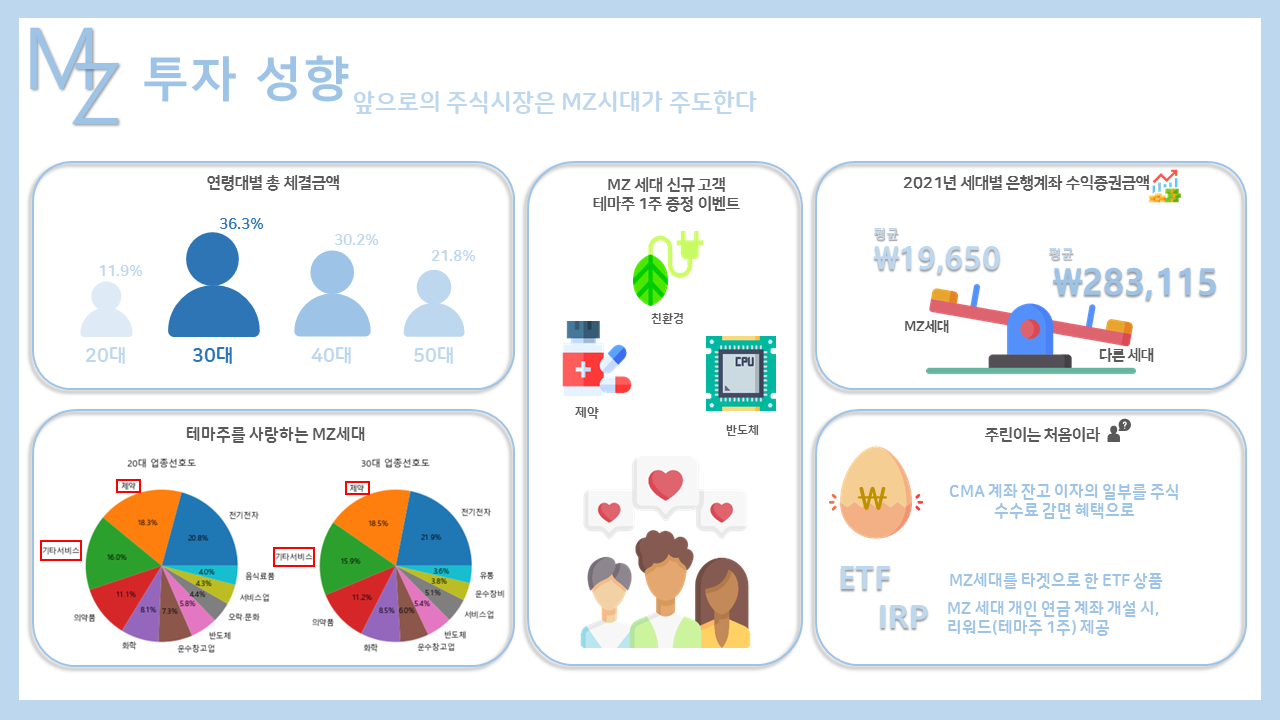

# 3. Modeling

## 3.1 K-means (신한은행 데이터)

### kmeans 군집분석을 통해 MZ세대의 자산 보유별 특징을 추출하고자 합니다.

코로나19 이후, MZ세대의 특징을 분류하기 위해 가장 최신의 데이터인 21년 03월 데이터를 이용해서 분류합니다.

### ● 데이터 준비

In [ ]:
shin3=shin2.loc[(shin2.기준년월==202103)&(shin2.MZ여부=='MZ세대'),]

In [ ]:
mz=shin3.drop(['기준년월','MZ여부'],axis=1).reset_index(drop=True)
mz.head()

### ● 파생변수 생성

- 파생변수 생성은 신한은행 데이터에서 컬럼에 대해 명세한 내용을 기반으로 생성했습니다.

- 총 수신 값이 있지만, 총소비가 0인 경우는 입출금통장에 입금하고 해당 월에 지급이 없는 저축용도 통장이거나 입출금 통장 없이 예금, 적금만 하는 고객일 수 있습니다. 

> 총소비금액이 0이지만 총수신금액이 0이 아닌 경우 이를 '저축용도'라는 파생변수를 생성.

- 총수신금액은 입출금통장을 포함하기 때문에 대부분의 사람이 총수신 값을 가지고 있으며, 잔액이 30만원 등과 같이 작은 경우가 많습니다. 그러나 예금, 투자 상품은 상대적으로 큰 금액으로 가입하기 때문에 총수신은 예금, 투자 상품의 평균 값보다 작게 나올 수 있습니다.

> 총 수신금액을 총수신금액과 관련된 컬럼(예적금금액,신탁금액, 수익증권금액) 및 총소비금액을 비교해서 더 높은 경우 1 아니면 0으로 하는 파생변수를 생성.

In [ ]:
print('입출금통장:',mz.loc[(mz.총소비금액==0)&(mz.총수신금액!=0),'총수신금액'].count())
print('예적금통장:',mz.loc[mz.총수신금액 < mz.예적금금액,'총수신금액'].count())
print('신탁투자통장:',mz.loc[mz.총수신금액 < mz.신탁금액,'총수신금액'].count())
print('수익증권투자통장:',mz.loc[mz.총수신금액 < mz.수익증권금액,'총수신금액'].count())

- 총소비금액이 0이지만 총수신금액이 0이 아닌 경우가 17104건으로 이를 '저축용도'라는 파생변수를 생성합니다.
- 예적금금액이 총소비금액보다 큰 경우가 27804건으로 이를 '예적금용도'라는 파생변수로 생성합니다.
- 신탁투자금액과 수익증권투자금액은 각각 99,62개로 그 수가 작아 파생변수로는 생성하지 않았습니다. 

In [ ]:
mz2=mz.copy() #테이블 복사
mz2['저축용도']=np.nan #파생변수 칼럼생성
mz2['예적금용도']=np.nan #파생변수 칼럼생성
mz2['저축용도']=np.where((mz.총소비금액==0)&(mz.총수신금액!=0),1,0) #저축용도 파생변수 생성
mz2['예적금용도']=np.where(mz.총수신금액 < mz.예적금금액,1,0) # 예적금용도 파생변수 생성
mz2.head()

In [ ]:
z=mz2.loc[mz2.나이==2] #20대만 추출
m=mz2.loc[mz2.나이==3] #30대만 추출

In [ ]:
z1=z.drop(['나이'],axis=1).reset_index(drop=True) #나이컬럼 삭제
m1=m.drop(['나이'],axis=1).reset_index(drop=True) #나이컬럼 삭제

### ● 기술통계량 확인

In [ ]:
z1.loc[:,'급여입금':].describe() #20대 기술통계량

In [ ]:
m1.loc[:,'급여입금':].describe()#30대 기술통계량

---
- MZ세대의 기술통계량을보면 30대와 20대 간 절대적인 규모의 차이가 존재했습니다. 따라서 20대와 30대를 동시에 클러스터링을 하는 것 보다는 20대와 30대를 따로 나누어서 클러스터링을 하는 것이 특징을 더 잘 나타낼 수 있을 것이라고 판단했습니다.
---

### ● 20대 클러스터링을 위한 변수 추출

In [ ]:
z_clustering=z1.loc[:,'급여입금':] # 클러스터링을 위한 변수 추출
z_clustering.head()

### ● 데이터 표준화

In [ ]:
sc=StandardScaler() #표준화
z_clustering_sc=sc.fit_transform(z_clustering)

### ● Kmeans 모델 생성(20대)

In [ ]:
def elbow(data,length):
    sse=[] #오차제곱합
    for i in range(1,length):
        kmeans=KMeans(n_clusters=i)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    plt.plot(range(1,length),sse,'bo-')
    plt.title('엘보우 기법')
    plt.xlabel('클러스터 개수')
    plt.ylabel('SSE')
    plt.show()
    print(sse)
elbow(z_clustering,10)

---
- 최적의 클러스터링 갯수를 찾기 위해 엘보우 기법을 사용했습니다.
- 엘보우기법의 결과 적절한 k값은 4로 나타났습니다.
---

### ● Kmeans 군집분석 (20대)

In [ ]:
kmeans=KMeans(n_clusters=4,random_state=1) #Kmeans 모델 적용
clusters=kmeans.fit(z_clustering_sc) # Kmeans 훈련
z_clustering['cluster']=clusters.labels_ #각 일치하는 행에 클러스터 번호 부여
# print(z_clustering['cluster'].unique())
z_clustering
z_clustering.groupby('cluster').count() #클러스터에 할당된 개수 확인

In [ ]:
z_clustering.groupby('cluster').mean() #클러스터의 평균값 계산

In [ ]:
z2=z1.copy() #테이블 복사

z2['cluster']=z_clustering['cluster']

### ● Kmeans 군집분석  시각화 (20대)

In [ ]:
X=z_clustering_sc
pca=PCA(n_components=2) #PCA 2차원
pca.fit(X)
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df
pca_df['cluster']=z_clustering['cluster']

%matplotlib inline

for i in z_clustering['cluster'].unique():
    tmp=pca_df.loc[pca_df['cluster']==i]
    plt.scatter(tmp[0],tmp[1])

---
### ● Kmeans 군집분석 결과(20대)
#### ● 3번클러스터 (29%) - 제외
- 4개의 클러스터에서 3번클러스터는 총수신금액이 존재하지만 총 소비금액이 0이였습니다. 또한 예적금 금액도 낮았으므로, 이 그룹은 신한은행이 주거래 은행이 아닌 그룹으로 정의를 내렸습니다. 이 그룹의 경우 주거래 은행에서의 금융 자산 보유 현황을 확인할 수 없으므로 특징에서는 제외했습니다.


#### ● 0번 클러스터 (무관심한 투자자 그룹) - 35%
- 이 그룹은 전반적으로 수신금액이 낮았지만 소비, 급여, 대출 측면은 2번 클러스터와 유사했습니다. 
- 수신금액을 제외한 나머지 부분이 동일하다는 점을 보아 은행을 통해 정상적인 금융거래를 실시하지만, 은행 상품에는 관심이 없다고 판단했습니다.  따라서 이 그룹을 은행 수신상품을 이용한 재테크에 관심이 없는 그룹으로 정의했습니다. 
- 단, 이 그룹은 단순히 제태크에 관심이 없는 그룹일 수도 있으나 주식투자나 가상화폐와 같은 은행 외적인 투자를 선호하는 그룹일 수도 있습니다.


#### ●1번 클러스터 (직장인 그룹) - 0.004%
- 급여입금액이 타 그룹에 비해 상당히 크고, 전반적인 자산의 규모가 다른 클러스터 보다 컸습니다. 
- 대학생, 취업준비생, 아르바이트생 등 다양한 타입이 혼합된 20대의 특성상 이들중 높은 급여수준을 기록했다는 점에서 직장인 그룹으로 정의했습니다. 
- 이 그룹의 경우에는 그 비중이 작고 다른 그룹과 차이가 커 30대 그룹에 포함시켜 관리하는 것이 더 효율적일 것으로 판단됩니다.

#### ● 2번 클러스터 (수동적 투자자) -36%
- 가장 많은 비중을 차지하는 클러스터로, 수신금액은 두번째로 높았습니다. 
- 앞선 무관심한 투자자 그룹 비슷한 소비, 급여, 대출규모를 가지고 있지만 은행의 총수신 금액은 더 높았습니다. 
- 또한 예적금 금액이 클러스터중 가장 높았고, 신탁금액보다 수익증권금액이 더 크다는 점에서 이들은 능동적인 자산관리보다는 수동적인 자산관리를 선호하는 그룹으로 정의했습니다.
---

### ● Kmeans 군집분석 (30대)

In [ ]:
m_clustering=m1.loc[:,'급여입금':]# 클러스터링을 위한 변수 추출
m_clustering

### ● 데이터 표준화

In [ ]:
m_clustering_sc=sc.fit_transform(m_clustering) #표준화

### ● Kmeans 모델 생성 (30대)

In [ ]:
def elbow(data,length):
    sse=[] #오차제곱합
    for i in range(1,length):
        kmeans=KMeans(n_clusters=i)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    plt.plot(range(1,length),sse,'bo-')
    plt.title('엘보우 기법')
    plt.xlabel('클러스터 개수')
    plt.ylabel('SSE')
    plt.show()
    print(sse)
elbow(m_clustering,10)

---
엘보우기법의 결과 적절한 k값은 5로 나타났습니다.

---

### ● Kmeans 군집분석 (30대)

In [ ]:
kmeans=KMeans(n_clusters=5,random_state=1) #K-means 생성
clusters=kmeans.fit(m_clustering_sc)  # 모델훈련
m_clustering['cluster']=clusters.labels_ #각 일치하는 행에 클러스터 번호 부여
print(m_clustering['cluster'].unique())
m_clustering
m_clustering.groupby('cluster').count() #클러스터에 할당된 개수 확인

In [ ]:
m_clustering.groupby('cluster').mean()#클러스터의 평균값 계산

In [ ]:
m2=m1.copy() #데이터 복사

m2['cluster']=m_clustering['cluster']

In [ ]:
m_clustering.groupby('cluster').mean()

### ● Kmeans 군집분석  시각화 (30대)

In [ ]:
#PCA를 통한 차원 축소
X1=m_clustering_sc
pca=PCA(n_components=2) #PCA 2차원
pca.fit(X1)
x_pca = pca.transform(X1)
pca_df2 = pd.DataFrame(x_pca)
pca_df2
pca_df2['cluster']=m_clustering['cluster']

#클러스터 시각화
%matplotlib inline

for i in m_clustering['cluster'].unique():
    tmp=pca_df2.loc[pca_df2['cluster']==i]
    plt.scatter(tmp[0],tmp[1])

 ---
 ### ● Kmeans 군집분석 결과 (30대)
 #### ● 0번클러스터 (19%) - 제외

- 20대 3번클러스터와 유사합니다.  총소비금액이 없고 총수신금액과 예적금 금액만이 존재합니다.  담보대출 금액이 다소 있으나,  매우 낮은편입니다. 따라서 20대 3번클러스터와 동일하게 특징에서는 제외합니다.


#### ● 1번클러스터(능동적 투자자) -39%

- 1번 클러스터는 클러스터중에서 가장 낮은 급여를 받고있지만 은행 수신상품은 적극적으로 활용했습니다.
- 앞선 20대의 수동적 투자자 그룹과 동일하게 예적금 금액이 높았지만 수익증권금액보다 신탁금액의 비중이 더 높았습니다.
- 이러한 점을 고려했을 때, 본인이 직접 자산관리에 적극적으로 나서는 능동적 투자자로 정의했습니다.


#### ● 2번클러스터 (무관심한 투자자) -34%

- 앞선 능동적 투자자 그룹보다 급여가 더 높았지만 수신금액과 대출금액이 낮은 편에 속했습니다. 특히 예적금 금액이 클러스터 중 가장 낮은 수치를 보였습니다.
- 따라서 이 집단은 어느정도 생활 여유 자금이 있고 은행 상품에는 관심이 없는 무관심한 투자자로 정의했습니다.


#### ● 3번 클러스터(공격적인 투자자) - 0.02%

- 유일하게 가맹점 매출입금이 존재하는 그룹인것으로 보아 자영업자가 포함되었음을 추측할 수 있습니다.
- 급여입금액이 높은편이고 은행 수신상품의 규모도 다른 클러스터에 비해 높은 것으로 보아, 적극적으로 은행 수신상품을 이용하는 것으로 보입니다.
- 그러나 담보대출금액과 신용대출금액도 매우 높은 편입니다. 부채비율이 지나치게 높아 금리상승시 가장 위험할 수 있는 집단입니다.
- 높은 부채비율에도 수신상품의 비중이 클러스터들 중 가장 높다는 점을 고려하여 공격적인 투자자로 정의했습니다.


#### ● 4번 클러스터(여유로운 투자자)  - 0.09%

- 이 클러스터는 급여입금이 가장 높았습니다.
- 하지만 대출금액과 수신상품 금액 모두 작았습니다.
- 하지만 예적금 금액이 앞선 무관심한 투자자와 달리 예적금 금액이 높았습니다.
- 따라서 이 집단을 은행 수신상품보다는 다른 투자수단을 선호하지만, 여유자금이 존재하는 것으로 판단하여 여유로운 투자자로 정의했습니다.


### ● 결과

- 30대는 전반적으로 신탁금액이 더 높은 것으로 나타났는데 20대에서는 수익증권금액이 높게 나타났습니다. 다만, 20대 직장인 그룹은 신탁금액이 더 높게 나타났는데, 이는 은행상품을 이용하는 고객 중 급여가 높을 수록 수익증권보다 신탁 상품을 이용한다는 것을 알 수 있습니다.
- 능동적으로 본인의 판단하에 투자하는 것을 선호하는 30대의 특성을 살려 투자 컨설팅을 통해 관심사에 관한 정보를 전달하되, 판단은 고객의 선택에 맡기는 서비스를 개발해야 합니다.
---

클러스터링 모델링을 통한 MZ세대 금융 자산 성향 정리<br>
<br>
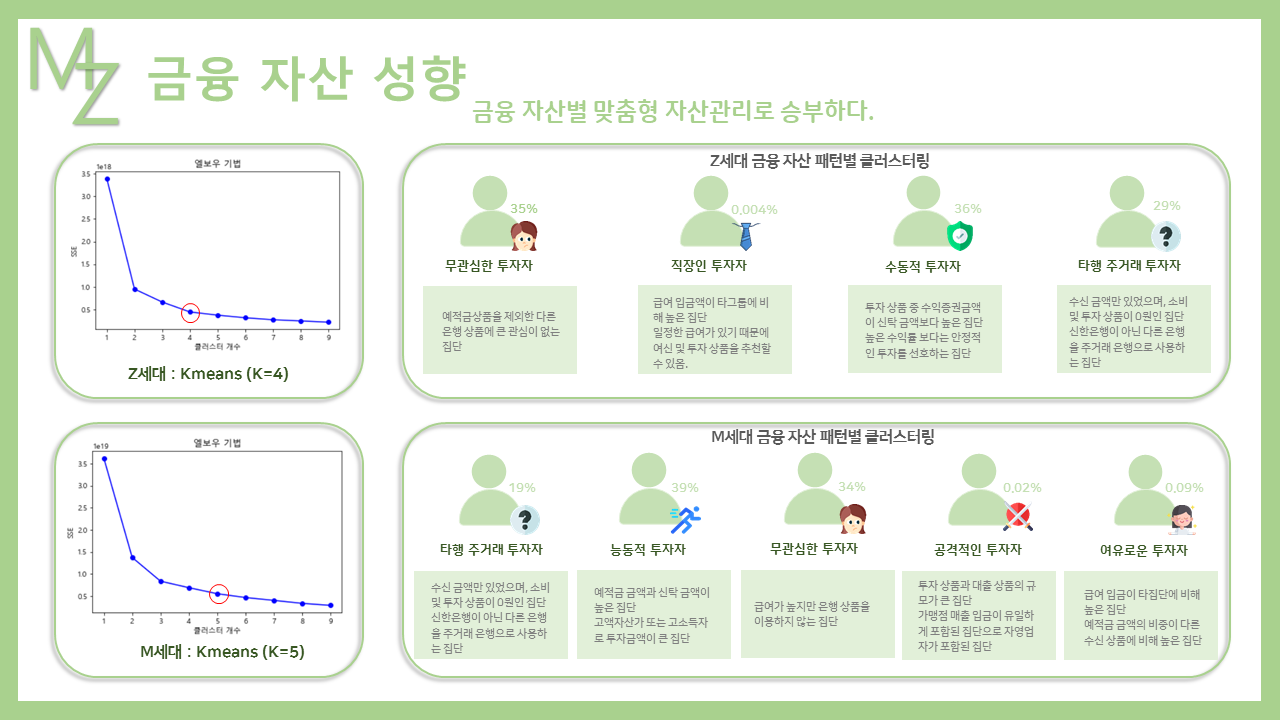

## 3.2 Decision Tree (BC카드 데이터)

### **Decision Tree** 모델을 활용하여 MZ세대를 반응변수로 두고 Feature Importances를 확인해보겠습니다.     
이를 통해, MZ세대를 구분지을 수 있는 가장 큰 특징이 무엇인지 분석하겠습니다.

### 3.2.1 Data Scaling

In [ ]:
bc.drop(['연령'],axis=1,inplace=True)
bc.drop(['품목대분류명','품목중분류명'],axis=1,inplace=True)

# 명목형 변수 더미화 (가구생애주기 컬럼만을 더미화)
x = pd.get_dummies(bc.iloc[ : , 0:-1 ])
y = bc.iloc[ : , -1 ]

# 훈련 데이터와 테스트 데이터를 분리 합니다. + 정규화 
from  sklearn.preprocessing  import MinMaxScaler

x_scaled = MinMaxScaler().fit(x).transform(x)

from  sklearn.model_selection  import   train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=0)
print(x_train.shape)  # (415437, 12)
print(x_test.shape)  # (103860, 12)
print(y_train.shape)  # (415437,)
print(y_test.shape) # (103860,)

---
+ 반응변수(MZ세대)와의 다중공선성 문제로 인해 연령 컬럼을 삭제하였습니다.
+ 품목명의 경우 대분류 : 13개 , 중분류 : 50개가 있기 때문에 대분류코드, 중분류코드 컬럼을 남겨두고 명목형변수 컬럼인 대분류명과 중분류명을 삭제하였습니다.
+ 명목형 변수인 가구생애주기를 더미화하여 수치형 변수로 바꾸었습니다.
+ 훈련데이터와 테스트 데이터로 분리했습니다.
+ MinMaxScaler 를 활용하여 수치형 변수를 정규화 하였습니다.
---

### 3.2.2 Decision Tree Modeling

In [ ]:
from  sklearn.tree  import  DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# 모델 훈련
model.fit(x_train, y_train)

# 모델 예측
result = model.predict(x_test)

# 10.   모델 평가
print(model.score(x_train,y_train)) # 훈련데이터 스코어 0.9004710702224404
print(model.score(x_test,y_test))  # 테스트 데이터 스코어 0.8997785480454458
print(model.feature_importances_)

---
+ Decision Tree Modeling 의 경우 criterion 에서 **엔트로피** 지수를 활용했습니다.    
+ Test Data의 컬럼이 12개이고 MZ 세대의 특징을 결정짓는 가장 중요도가 높은 변수를 구하기 때문에 Max Depth의 경우 3을 주었습니다.
+ 위의 결과, 훈련 데이터의 분류 정확도는 약 90.047%이며, 테스트 데이터의 분류 정확도는 약 89.977% 입니다.
+ 변수 중요도의 경우 [가구생애주기 - 신혼영유아가구] - [가구생애주기 - 1인가구] - [가구생애주기 - 초중고자녀가구] 순으로 중요도를 보입니다.
---

### 3.2.3 Graphviz 를 활용한 시각화

In [ ]:
# 11. graphviz 로 의사결정트리 그리기
import graphviz
from sklearn.tree import export_graphviz
import os
os.environ["PATH"]+=os.pathsep+'C:\\Program Files\\Graphviz\\bin'

export_graphviz(model, out_file="tree.dot", class_names='mz세대',
                feature_names = x.columns, impurity=True, filled=True,special_characters = True)

with open("tree.dot",encoding='utf-8') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

import pydotplus
pydot_graph = pydotplus.graph_from_dot_data(dot_graph)
pydot_graph.set_size('"10,9!"')
pydot_graph.write_png('resized_tree.png')
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

---
Graphviz 를 활용해 시각화한 결과, MZ세대로 구분지을 수 있는 가장 큰 요소는 가구생애주기(가구유형)의 **1인가구** 유형 유무였습니다.
앞서 분석한 소비 EDA에서 MZ세대의 1인가구의 소비 비중이 증가했다는 점을 고려하면, MZ세대를 대상으로 상품 또는 서비스를 기획할 때, 1인가구를 고려하여 전략을 수립해야 할 것입니다.

---

MZ세대 소비 성향 정리<br>
<br>
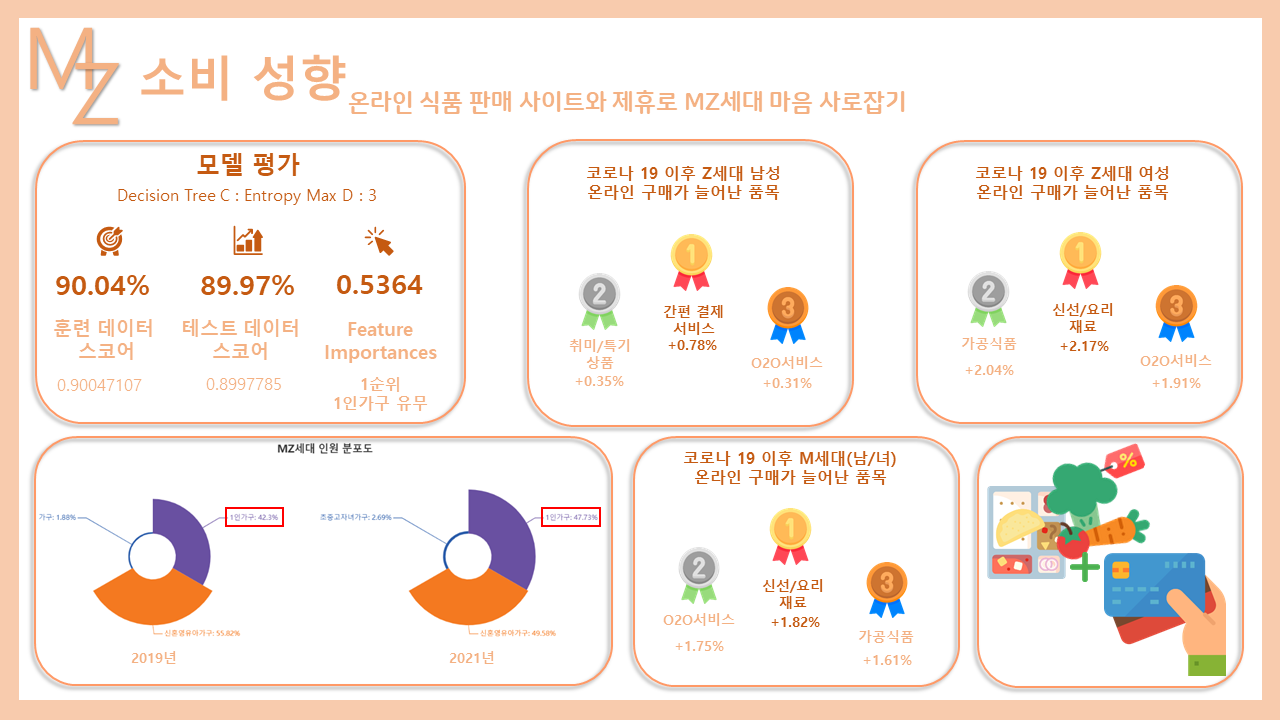

# 4. Conclusion and Insight: 결론 및 아이디어 제시

### 지금까지 소득 및 자산, 소비, 투자 부문으로 나누어 MZ세대의 특징을 분석했습니다. 분석된 결과를 바탕으로 결론을 도출하고, 도출된 결론을 바탕으로 금융 서비스 및 상품을 기획하는데 활용할 수 있는 아이디어를 아래와 같이 제시하고자 합니다.

## 4.1 소득 및 자산

### ● 결론
- MZ세대의 급여입금액이 기성세대보다 2 배 이상 높았습니다.<br>
<br>
- MZ세대의 대출금액이 지속적으로 증가하면서 기성세대와 대출금액 격차가 점차 벌어지고 있습니다.<br>
<br>
- MZ세대의 전세자금 대출금액은 기성세대의 전세자금 대출금액보다 더 많았습니다.

### ● 아이디어 제시
- MZ세대는 급여 등 정기적인 소득이 높고, 대출을 받는데 적극적입니다. 클러스터링 모델링에서는 공격적인 투자자로 분류된 그룹입니다. 이 그룹은 대출상환 능력도 우수하고, 대출을 받는데 적극적이므로, 다양한 마케팅을 통해 추가 대출을 권장할 수 있습니다. 예를 들어, 추가 대출 시 대출금액에 비례하여 금리 우대를 제공할 수 있습니다. 또한, 코로나19 상황과 신기술(Tech)에 관심이 많은 MZ세대의 특징을 살려, 비대면 대출 상담, 1:1 AI 상담 플랫폼 등을 제공할 수 있을 것입니다.<br>
<br>
- MZ세대의 전세자금대출이 증가한 사실을 토대로, MZ세대가 부동산에 대한 관심이 많다는 것을 알았습니다. 따라서, 전세자금대출에 관심이 많은 MZ세대를 대상으로 지역구, 건물유형, 부동산유형(매매,전세,월세)에 따라 자신의 자산 정보를 입력할 경우 현재 모아야될 자산 또는 필요한 대출상품을 알려주는 서비스를 제공할 수 있습니다.<br>
<br>
- 은행이 가지고 있는 고객의 빅데이터를 활용하여, MZ세대에게 자신과 비슷한 소득 및 자산을 가진 집단의 금융패턴 정보를 제공하여 MZ세대에게 개인 맞춤형 자산 관리 서비스를 제공합니다.

## 4.2 소비

### ● 결론
- MZ세대의 가구생애주기 중 1인가구의 온라인 소비 비중이 증가하였습니다.<br>
<br>
- MZ세대 남성의 경우, 간편 결제 서비스, 취미/특기, e-머니 상품권의 구매 건수가 증가했습니다.<br>
<br>
- MZ세대 여성의 경우, 신선/요리재료, 건강식품과 같은 건강 관련 상품의 구매 건수가 증가했습니다.

### ● 아이디어 제시
- 코로나 19 이후 MZ세대 1인 가구의 소비 비중이 증가했다는 점에서 혼자서도 쉽게 혜택을 받을 수 있는 맞춤형 서비스를 제공할 필요가 있을 것으로 보입니다. 따라서 다음과 같은 상품을 MZ세대에게 제공하면 긍정적인 효과를 제공할 수 있을 것이라고 생각합니다.
  1. 혼자서 즐길 수 있는 취미나 온라인 상품에 관한 혜택을 제공하는 카드 상품을 제공
  2. 건강/친환경과 관련된 기업과 협업을 통해 마일리지, 할인, 상품권 제공 등의 혜택을 제공(마켓컬리, 오아시스 같은 신선 재료 제공업체와 협력)<br>
<br>
 
- 직접 참여하며 영향력을 미치는 것을 선호하는 MZ세대의 특성을 살려 친환경과 건강 관련한 활동에 대한 우대 혜택을 제공할 수 있습니다. (조깅 + 환경을 결합한 플로깅에 참여하고 이를 정기적으로 인증할 경우 연회비 혜택 등)

## 4.3 투자

### ● 결론
- 코로나19 이후 MZ세대의 수익증권금액과 신탁금액은 지속적으로 감소하고 있습니다. MZ세대가 은행의 수신상품이 MZ세대에게 매력적이게 느껴지지 못한것으로 보입니다.<br>
<br>
- MZ세대 중 30대는 거래수와 총체결금액이 모든 세대중에서 가장 많았습니다. 20대는 투자금액은 적었지만 40대와 거래수가 비슷하여, 20대가 40대에 비해 상대적으로 고정수입이 적음에도 주식 투자 활동은 활발히 하는 것을 알 수 있었습니다.<br>
<br>
- 코로나19의 유행시기에 테마주인 제약 종목과 진단서비스(기타서비스) 업종에 기성세대보다 MZ세대가 더 많이 투자했습니다. 또한, 시가총액이 적은 코스닥 종목 위주로 투자하는 경향이 있었습니다.

### ● 아이디어 제시
- 시가총액이 낮은 테마주에 관심이 많은 MZ세대의 투자를 유도하기 위해 관련 종목들을 묶어 수신상품(펀드 등)을 출시할 수 있습니다. 특히, 클러스터링 그룹 중 20대 수동적인 투자자에게 해당 펀드를 추천하여 그들의 투자를 이끌어 낼 수 있으리라 예상됩니다.<br>
<br>
- 신규 주식 계좌를 개설하는 MZ세대에게 최근 테마 종목 1주를 이벤트로 제공하여 MZ세대 고객을 유치할 수 있습니다. 또한, 투자에 게임요소를 추가하여 일정 수익률 이상을 낼 경우 다양한 리워드를 제공하여 MZ세대의 관심을 유도할 수 있으리라 생각됩니다.

활용 방안 정리<br>
<br>
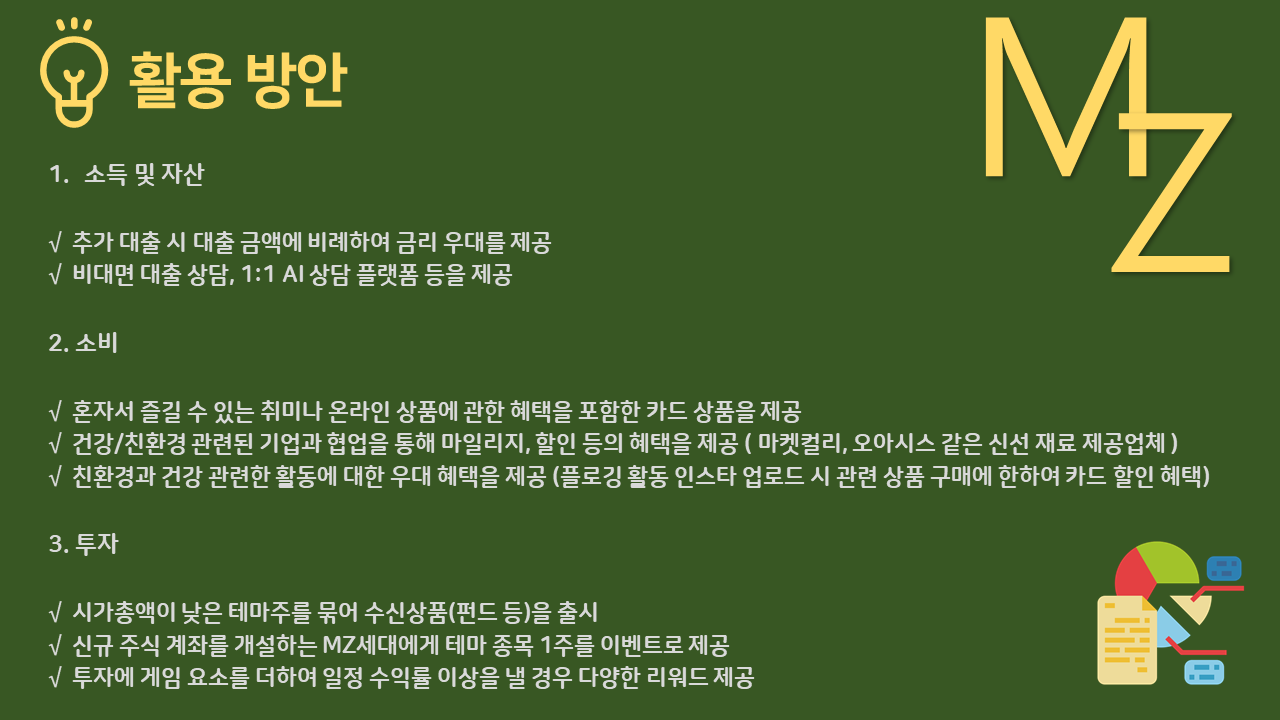

이상입니다.
긴글 읽어주셔서 감사합니다. :)